In [1]:
import sklearn #for predictive modeling
from patsy import dmatrices #for R-like formulas. https://patsy.readthedocs.io/en/latest/
import statsmodels.api as sm #for more stats oriented information.
import seaborn as sns #for better graphics
sns.set() #better matplotlib defaults
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import requests

The USMC Officer Candidacy School (OCS) data capture the performance of
a number of candidates who attended USMC Officer Candidacy School in an
undisclosed year. Access it as a csv file here: [link to data](https://nps01-my.sharepoint.com/:x:/g/personal/robert_bassett_nps_edu/EZqliEZkK-BIlXLzYo2DvQAB5So7Or-__iqqvaM91OuJOg?e=NapDAy&download=1)

More details on the columns are below.

- The ACADEMICS, LEADERSHIP, and PHYSICAL.FITNESS columns aggregate the performance on the assessments for each of these categories. Similarly, the Overall column is an aggregate measure of performance for all assessments.

- CFT: Combat Fitness Test.

- PFT: Physical Fitness Test. The Inventory PFT was administered upon arrival, whereas the Final PFT was given near the end of OCS.

- LRC: The Leadership Reaction Course is, as its name implies, a leadership assessment.

- SULE 2: The SULE (Small Unit Leadership Evaluation) is the culminating event at Marine Corps OCS, containing leadership, knowledge, and physical fitness challenges. There are two flavors of the SULE, and this OCS cohort took the second version.

In [2]:
url = 'https://nps01-my.sharepoint.com/:x:/g/personal/robert_bassett_nps_edu/EZqliEZkK-BIlXLzYo2DvQAB5So7Or-__iqqvaM91OuJOg?e=NapDAy&download=1'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.head()

,Unit,Exam 1,Day Land Navigation,LRC 2,Command Evaluation 1,Exam 2,Night Land Navigation,Exam 3,6 Mile Hike,Exam 4,...,9.3 Mile Hike,SULE 2,CFT,Command Evaluation 2,Inventory PFT,Final PFT,ACADEMICS,LEADERSHIP,PHYSICAL FITNESS,Overall
0,3rd,82.1430,100,89.53,84,80.3573,90,100,100,78.5716,...,100,82.88,90.77,85,92.3077,93.2308,86.2358,85.170,95.0216,87.8994
1,4th,92.8572,100,84.88,87,96.4286,100,98,100,83.9287,...,100,87.72,90.15,88,96.6154,99.3846,93.6672,86.672,95.9228,90.7335
2,4th,89.2858,100,83.00,88,94.6429,100,98,100,91.0715,...,100,83.73,97.54,89,92.6154,96.9231,94.0600,85.819,94.7786,90.1192
3,2nd,82.1430,100,81.12,86,92.8572,90,95,100,85.7136,...,100,83.01,86.77,85,90.7692,92.0000,89.4570,83.967,93.4124,87.7009
4,5th,85.7144,100,87.95,85,89.2858,90,98,100,83.9287,...,100,87.81,95.38,88,94.4615,97.2308,89.7244,87.373,95.5966,90.0167


## First Let's Do Exploratory Data Analysis

In [4]:
#get rid of spaces in the names, replace with underscores
df.columns = [df.columns[i].replace(' ', "_") for i in range(len(df.columns))]

df.columns

Index(['Unit', 'Exam_1', 'Day_Land_Navigation', 'LRC_2',
       'Command_Evaluation_1', 'Exam_2', 'Night_Land_Navigation', 'Exam_3',
       '6_Mile_Hike', 'Exam_4', 'Endurance_Course', 'Obstacle_Course',
       'Platoon_Commander's_Inspection', '9.3_Mile_Hike', 'SULE_2', 'CFT',
       'Command_Evaluation_2', 'Inventory_PFT', 'Final_PFT', 'ACADEMICS',
       'LEADERSHIP', 'PHYSICAL_FITNESS', 'Overall'],
      dtype='object')

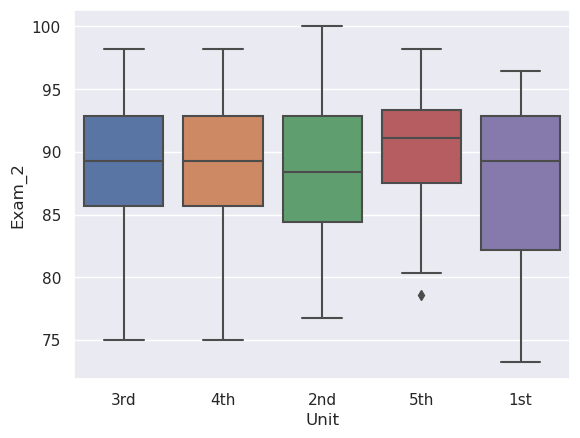

In [5]:
sns.boxplot(x='Unit', y='Exam_2', data=df)
plt.show()

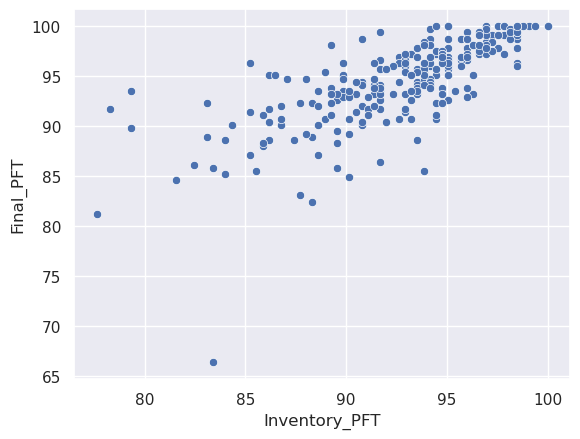

In [6]:
sns.scatterplot(x='Inventory_PFT', y='Final_PFT', data=df)
plt.show()

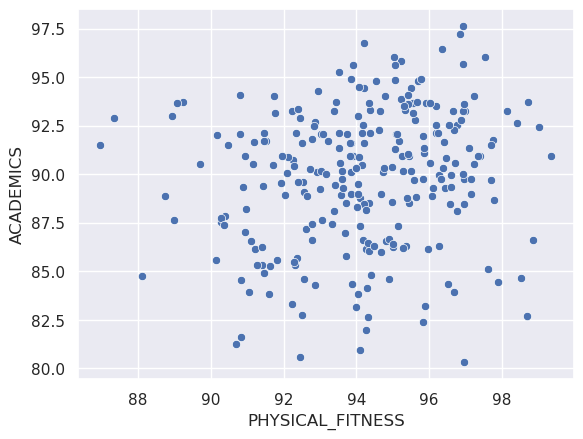

In [7]:
sns.scatterplot(x='PHYSICAL_FITNESS', y='ACADEMICS', data=df)
plt.show()

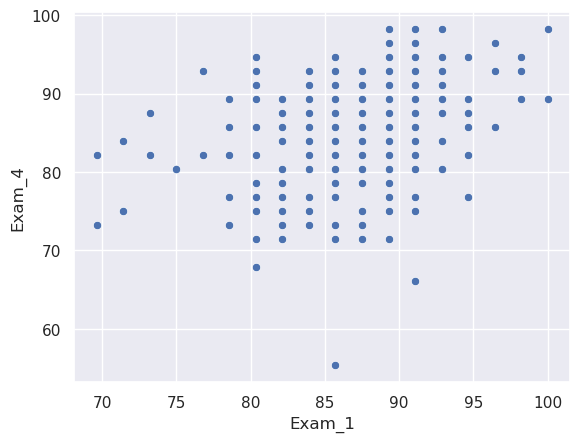

In [8]:
sns.scatterplot(x='Exam_1', y='Exam_4', data=df)
plt.show()

In [9]:
from sklearn.decomposition import PCA
pca_model = PCA() #declared a PCA object
pca_model.fit(df.iloc[:,df.columns != 'Unit'])

PCA()

/tmp/ipykernel_9095/668321530.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


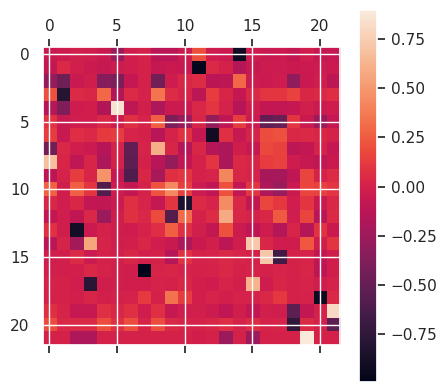

In [10]:
plt.matshow(pca_model.components_)
plt.colorbar()
plt.show()

In [11]:
pca_model.explained_variance_ratio_ 
#we have some degenerate linear combs of columns.
#this is because some columns are means of others.

array([2.48194943e-01, 1.82286909e-01, 1.14365451e-01, 1.03482297e-01,
       9.47075093e-02, 5.90617213e-02, 4.99324035e-02, 3.04723013e-02,
       2.49350093e-02, 2.03313795e-02, 1.83355589e-02, 1.39431314e-02,
       1.21022104e-02, 1.12240378e-02, 7.27382613e-03, 6.07894133e-03,
       2.03926909e-03, 1.04847500e-03, 1.84625173e-04, 1.07624696e-12,
       7.94352726e-13, 8.69748947e-32])

In [12]:
pca_model.components_[-3:,:] #each row is a principal component. See ?pca_model

array([[ 7.17157224e-02,  1.30392648e-02, -6.49660477e-02,
        -6.49641740e-02,  7.17163124e-02,  2.60788271e-02,
         7.17157404e-02, -2.43379182e-02,  7.17159760e-02,
        -6.49018763e-02, -2.43383900e-02, -6.49650258e-03,
        -4.05644591e-02, -9.74488538e-02, -1.62256613e-02,
        -9.09538377e-02, -8.11237625e-03, -2.43393794e-02,
        -5.28804643e-01, -8.08177051e-02, -3.72999317e-06,
         8.11292422e-01],
       [ 1.92587918e-01,  3.50158349e-02,  4.19398558e-02,
         4.19393135e-02,  1.92588432e-01,  7.00318314e-02,
         1.92587898e-01,  1.57119361e-02,  1.92587824e-01,
         4.18960647e-02,  1.57107409e-02,  4.19419663e-03,
         2.61871170e-02,  6.29086947e-02,  1.04748780e-02,
         5.87154907e-02,  5.23670540e-03,  1.57112502e-02,
        -7.44466129e-01,  5.21726636e-02,  6.79756388e-06,
        -5.23734534e-01],
       [ 2.61846593e-12,  4.76116553e-13, -1.78971365e-01,
        -1.78971365e-01,  2.61865297e-12,  9.52247838e-13,
    

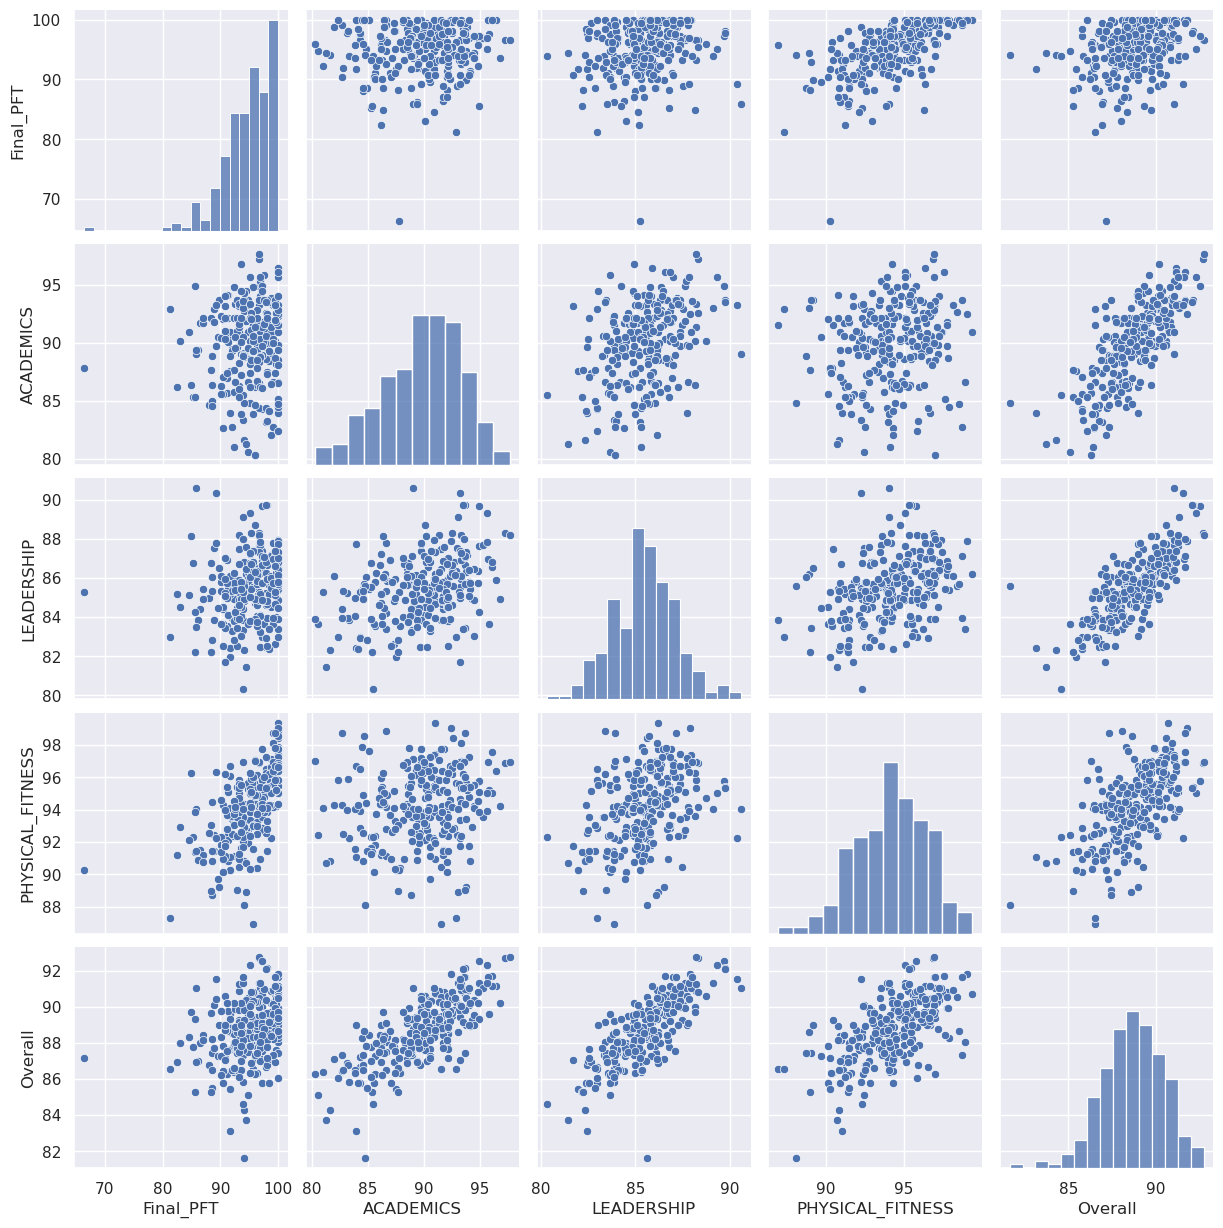

In [13]:
sns.pairplot(data=df[['Final_PFT', 'ACADEMICS', 'LEADERSHIP','PHYSICAL_FITNESS', 'Overall']])
plt.show()

/tmp/ipykernel_9095/1004561714.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


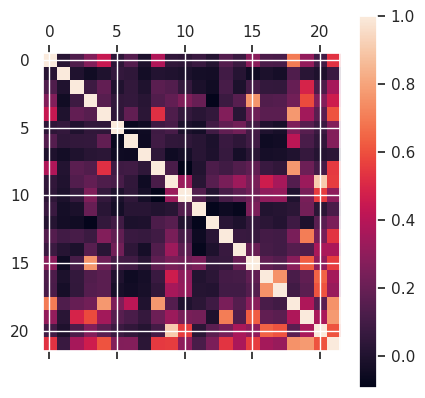

In [14]:
mat = np.corrcoef(df.iloc[:,df.columns != 'Unit'], rowvar=False)
plt.matshow(mat)
plt.colorbar()
plt.show()

## Next Let's Do Predictive Modeling

In [15]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
pen_param = 5.0
models = [Lasso(alpha=pen_param), Ridge(alpha=pen_param), 
          DecisionTreeRegressor(max_depth=3), KNeighborsRegressor(n_neighbors=5)]
cols_of_int = ['Exam_1', 'Day_Land_Navigation', 'LRC_2',
       'Command_Evaluation_1', 'Exam_2', 'Night_Land_Navigation', 'Exam_3',
       '6_Mile_Hike', 'Exam_4', 'Endurance_Course', 'Obstacle_Course',
       "Platoon_Commander's_Inspection", '9.3_Mile_Hike', 'SULE_2', 'CFT',
       'Command_Evaluation_2', 'Inventory_PFT', 'Final_PFT']
for i, model in enumerate(models):
    model.fit(df[cols_of_int], df["Overall"])
    if i in (0,1):
        print(pd.DataFrame({'predictor':cols_of_int, 'coef':model.coef_}))
    print("MSE: ", np.sqrt(np.mean((model.predict(df[cols_of_int]) - df["Overall"])**2)))
    print("=======================================")
    

                         predictor      coef
0                           Exam_1  0.000000
1              Day_Land_Navigation  0.000000
2                            LRC_2  0.000000
3             Command_Evaluation_1  0.000000
4                           Exam_2  0.016176
5            Night_Land_Navigation  0.000000
6                           Exam_3  0.000000
7                      6_Mile_Hike  0.000000
8                           Exam_4  0.021490
9                 Endurance_Course  0.000000
10                 Obstacle_Course  0.000000
11  Platoon_Commander's_Inspection  0.000000
12                   9.3_Mile_Hike  0.000000
13                          SULE_2  0.000000
14                             CFT  0.019079
15            Command_Evaluation_2  0.000000
16                   Inventory_PFT  0.000000
17                       Final_PFT  0.000000
MSE:  1.5649975840423722
                         predictor      coef
0                           Exam_1  0.055043
1              Day_Land_Naviga

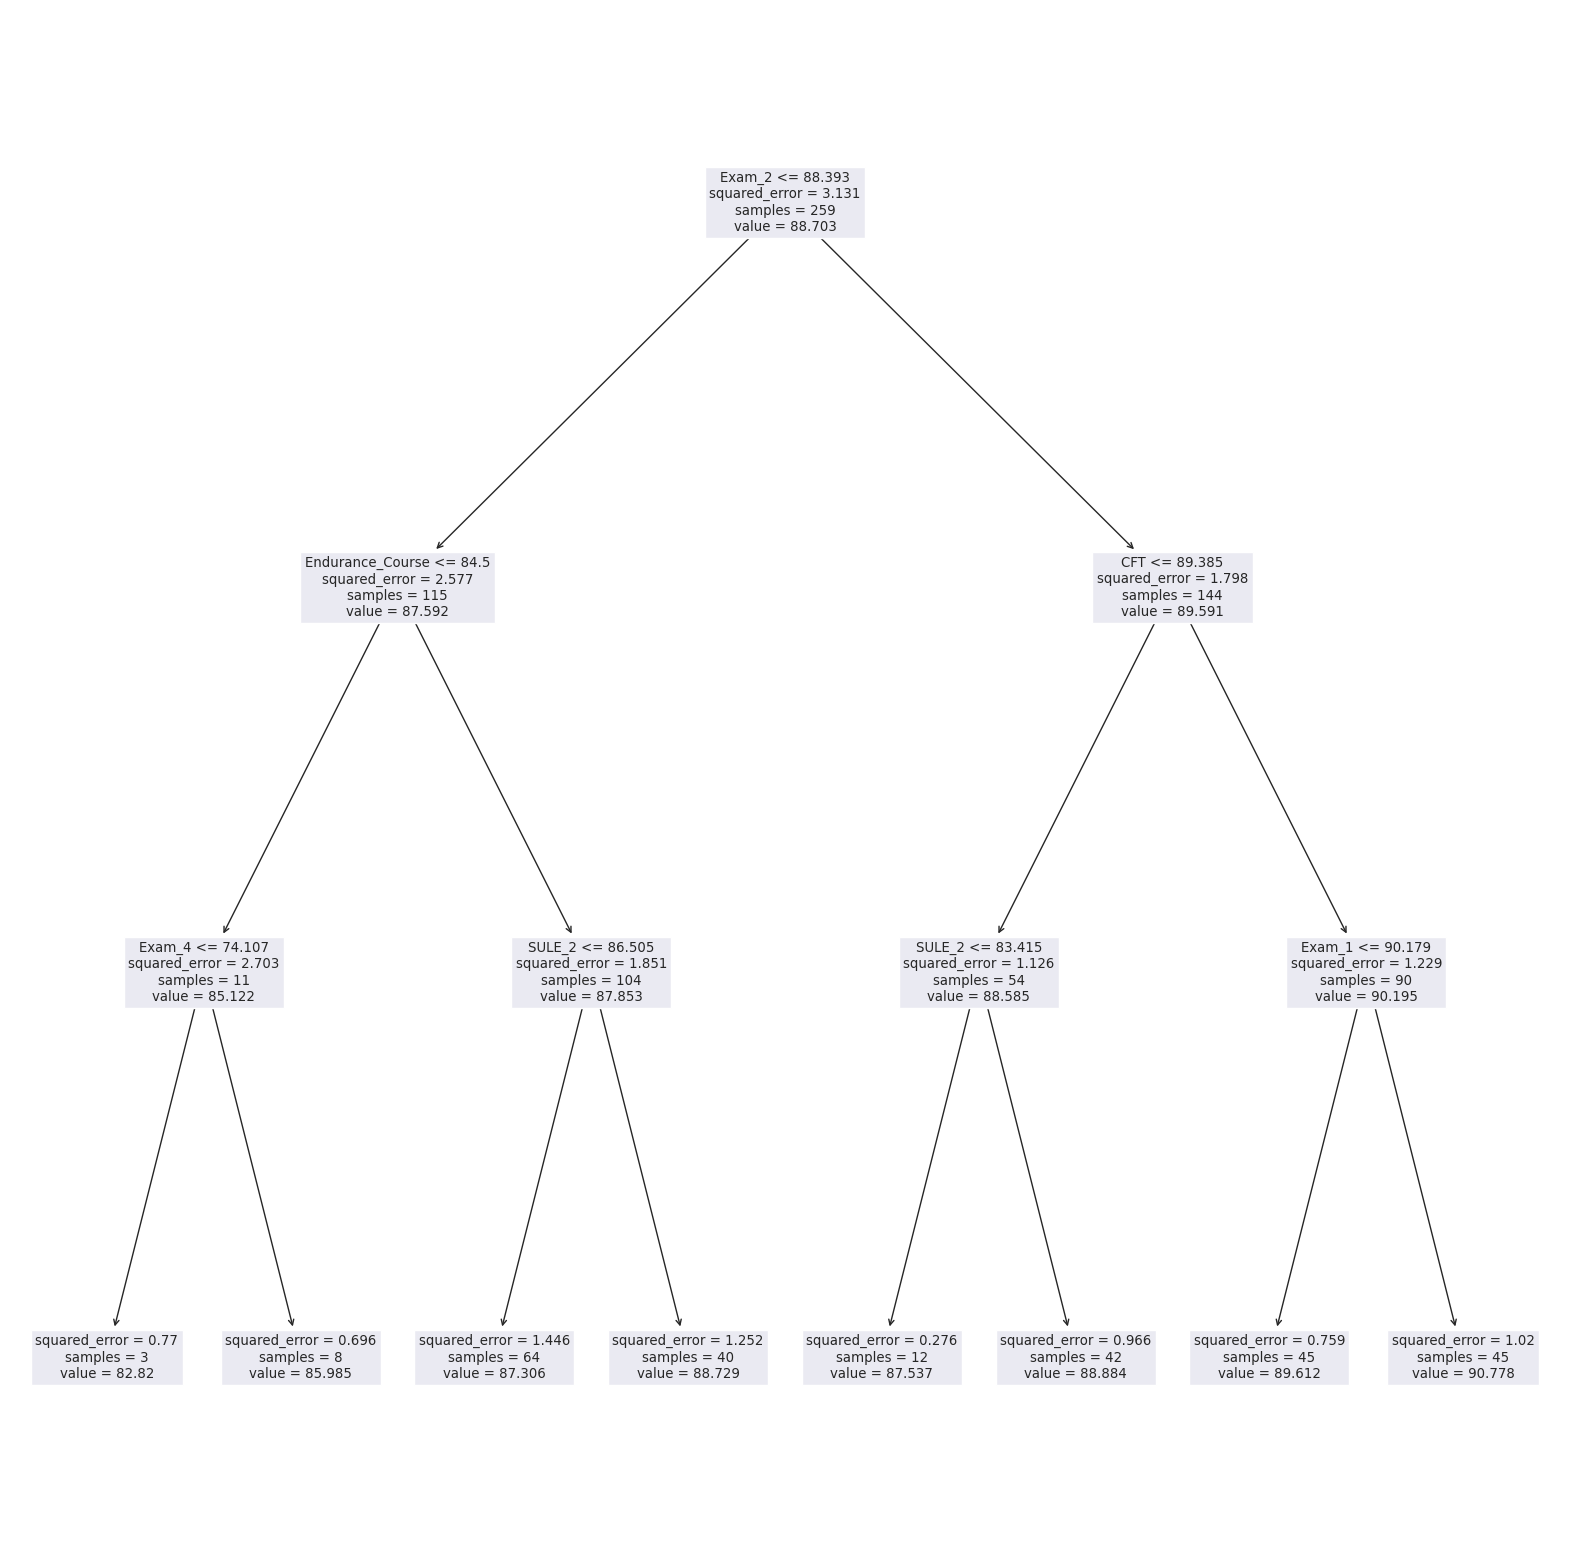

In [16]:
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
sklearn.tree.plot_tree(models[2], ax=ax, feature_names=cols_of_int)
plt.show()

In [17]:
#An example using patsy
y, X = dmatrices('SULE_2 ~ np.sqrt(CFT) + Unit', data=df)

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y) #watch out for degeneracy

LinearRegression()

In [19]:
lm.intercept_

array([85.11870944])

In [20]:
model = sm.regression.linear_model.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SULE_2   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9091
Date:                Wed, 28 Sep 2022   Prob (F-statistic):              0.476
Time:                        16:10:07   Log-Likelihood:                -690.25
No. Observations:                 259   AIC:                             1393.
Df Residuals:                     253   BIC:                             1414.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       85.1187      1.701     50.041      0.000      81.769      88.469
Unit[T.2nd]     -0.5303      0.695     -0.763      0.446      -1.899       0.838
Unit[T.3rd]      0.4981      0.688      0.724      0.470      -0.857       1.853
Unit[T.4th]      0.7566      0.697      1.086      0.278      -0.615       2.129
Unit[T.5th]     -0.0493      0.692     -0.071      0.943      -1.412       1.313
np.sqrt(CFT)     0.0829      0.181      0.458      0.648      -0.274       0.440
==============================================================================
Omnibus:                        6.641   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.036   Jarque-Bera (JB):               10.538
Skew:                           0.036   Prob(JB):                      0.00515
Kurtosis:                       3.986   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

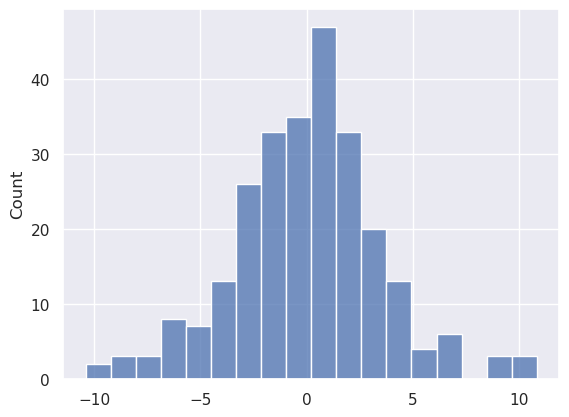

In [21]:
sns.histplot(result.resid) #histogram of the residuals
plt.show()